In [15]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import glob

## Load model logs
Merge several models into a single logfile for plotting

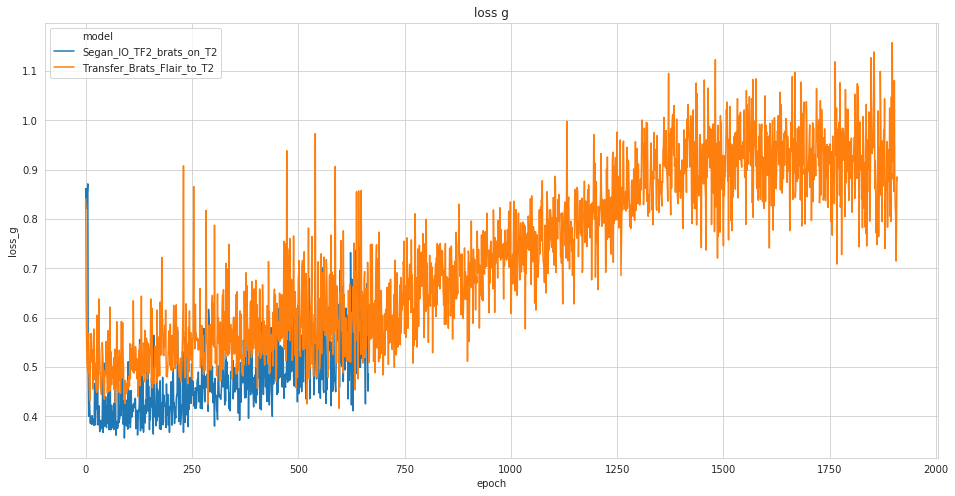

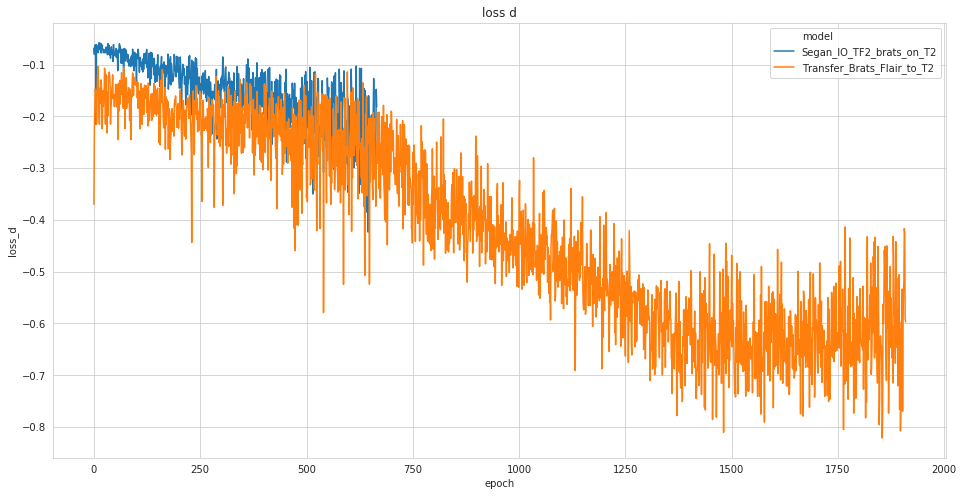

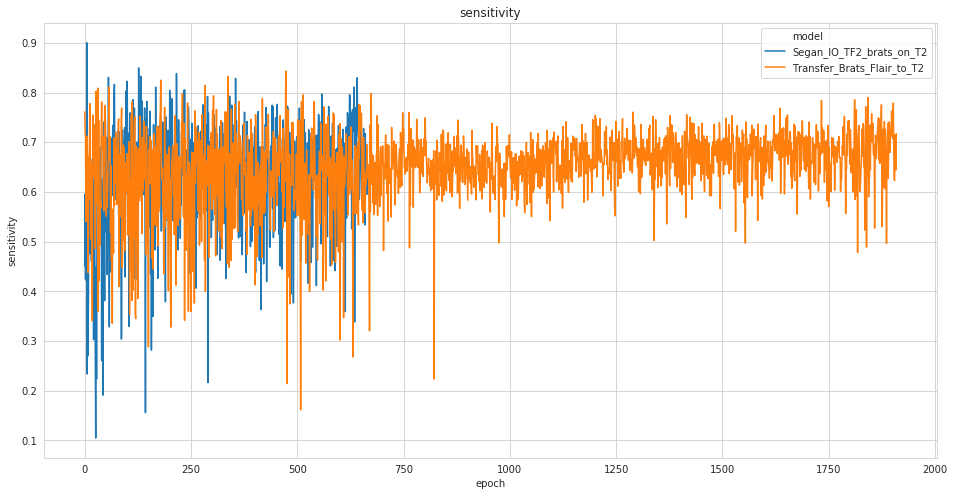

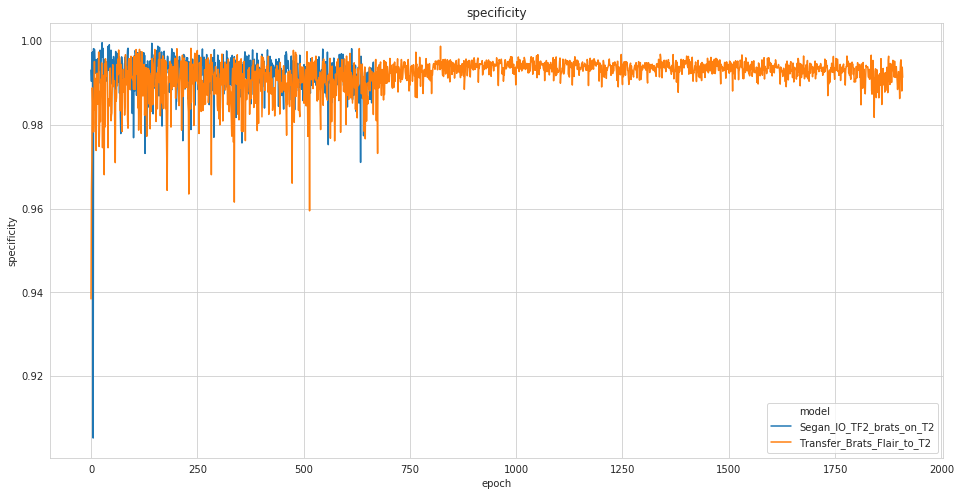

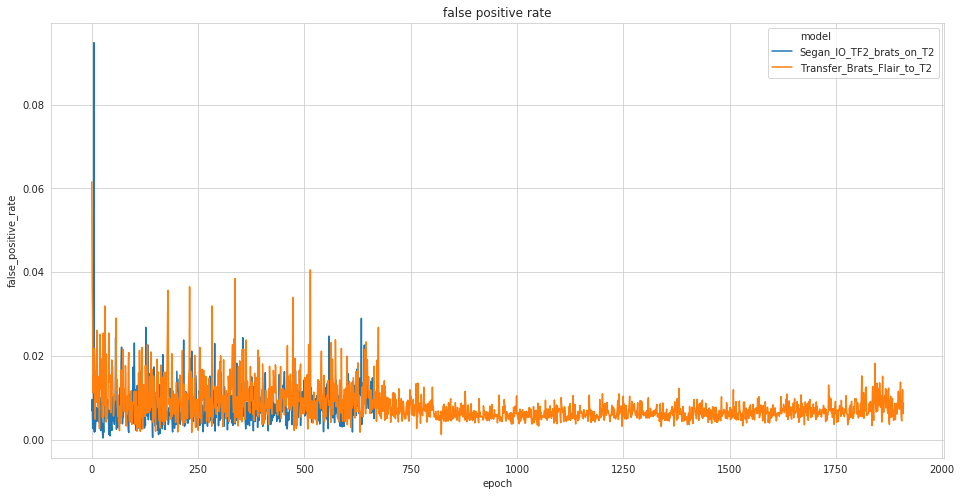

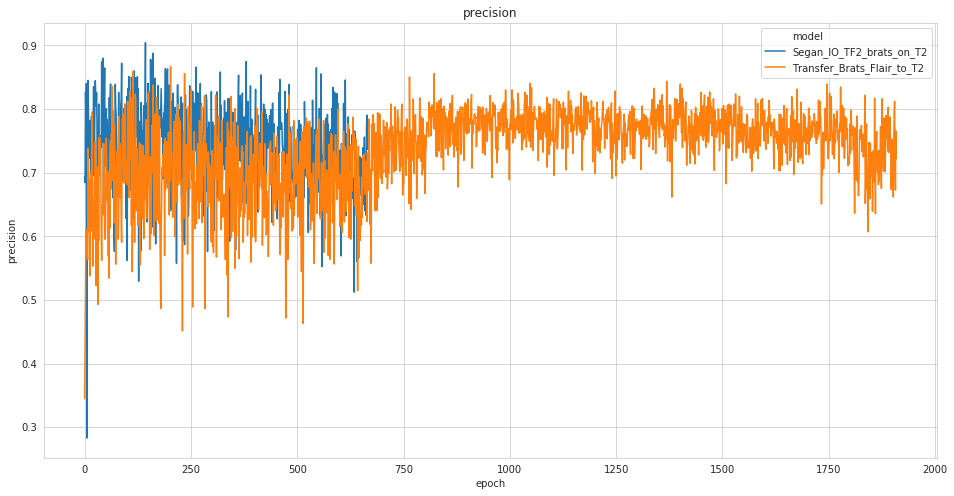

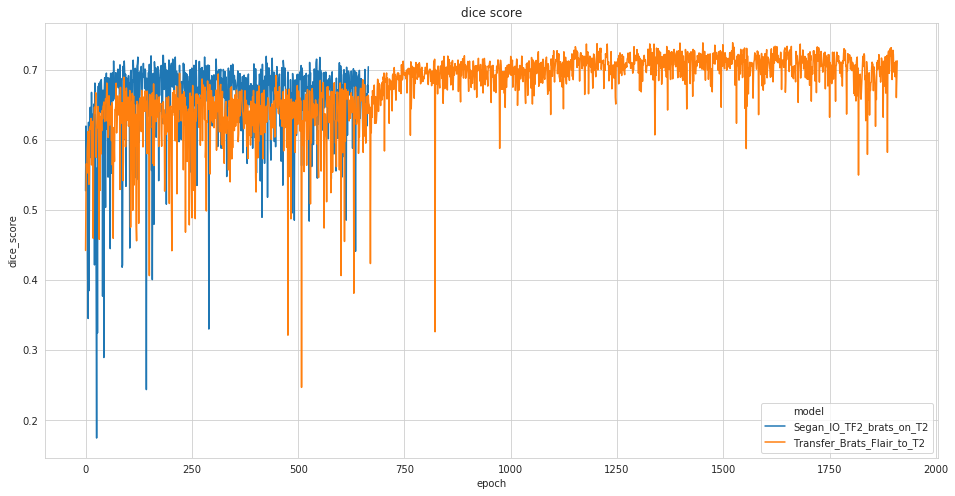

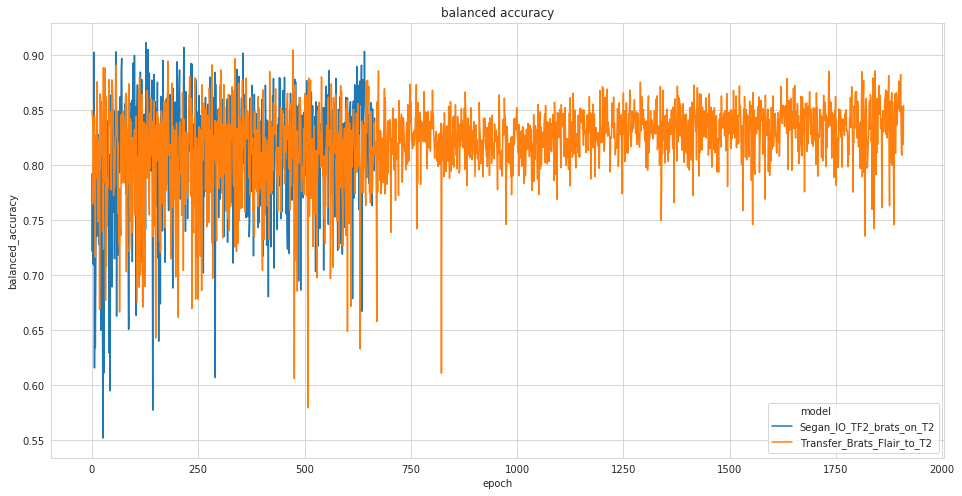

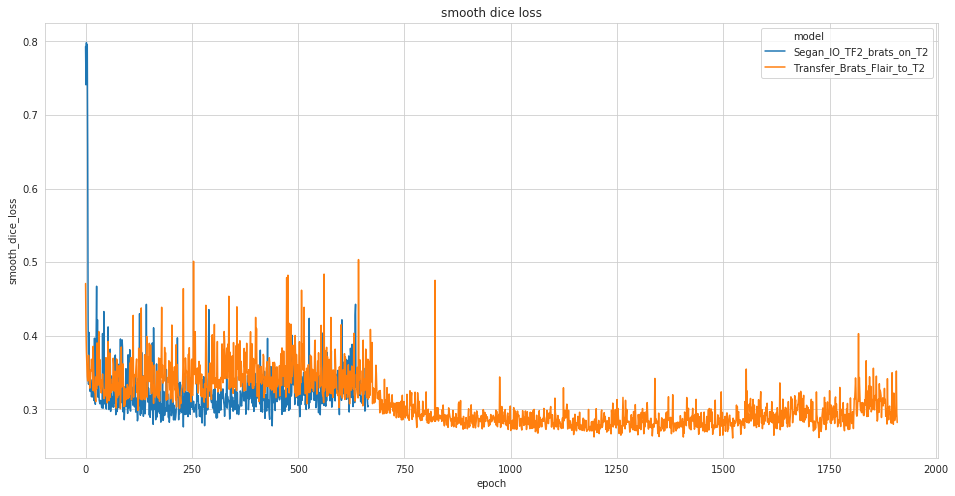

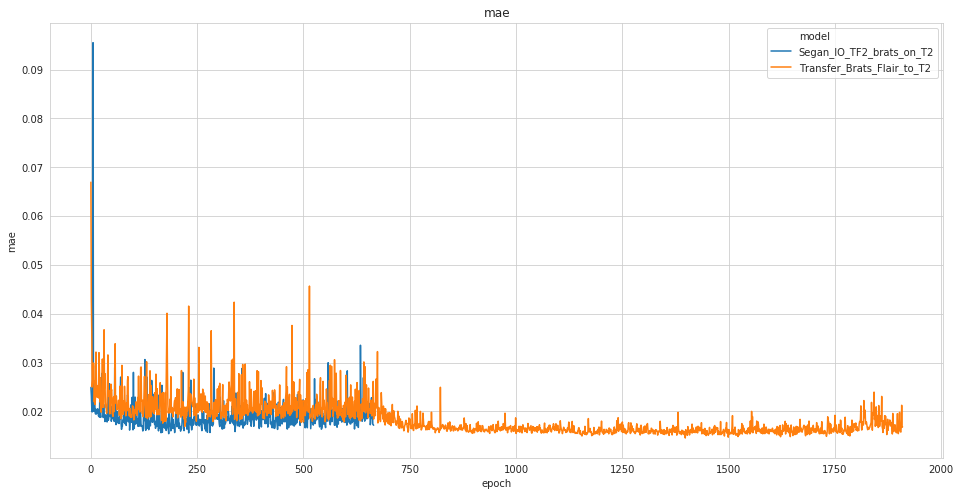

In [16]:
# A: Show training loss for SegAN_IO base models
models = ['Segan_IO_TF2_brats_on_T2', 'Transfer_Brats_Flair_to_T2']
#models = ['Segan_IO_TF2_brats_on_T1c', 'Transfer_Brats_Flair_to_T1c']
#models = ['Segan_TF2_brats_ALL', 'Segan_IO_TF2_brats_ALL', 'Segan_NoDice_TF2_brats_ALL']
#models = ['Custom_MultiFOV_bd2decide_on_T1_alt500', 'Custom_MultiFOV_D6_bd2decide_on_T1_alt50', 'Custom_MultiFOV_G6_bd2decide_on_T1_alt50']
#models = ['Segan_IO_TF2_brats_on_T1', 'Segan_IO_TF2_brats_on_T1c', 'Segan_IO_TF2_brats_on_T2', 'Segan_IO_brats_on_FLAIR']
#models = ['Segan_IO_TF2_bd2decide_on_T2', 'Segan_IO_TF2_bd2decide_on_T2_alt500']
# B: First run of transfer experiments
#models = ['Segan_IO_TF2_brats_on_T1', 'Transfer_Brats_Flair_to_T1', 'Transfer_Brats_Flair_to_T1_freeze_all']
#models = ['Segan_IO_TF2_bd2decide_on_T2', 'transfer_bratsT2_to_B2D-freeze_all']
LIMIT_EPOCH_TO = 20000
runs = ['valid', 'train']
dfs = []

for mod in models:
    for run in runs:
        df = pd.read_csv('models/{}/log_{}.csv'.format(mod, run), index_col=0)
        df['model'] = mod
        df['run'] = run
        df = df.reset_index()
        dfs += [df]
log = pd.concat(dfs)
log = log[log['epoch']<=LIMIT_EPOCH_TO]

def plot(stat, run_filter=None):
    sb.set_style("whitegrid")
    plt.figure(figsize=(16, 8))
    plt.title(stat.replace('_', ' '))
    if run_filter is not None:
        data = log[log['run']==run_filter]
    return sb.lineplot(data=data, x='epoch', y=stat, hue='model')

stats = [c for c in log.columns if c not in ['datetime', 'epoch', 'run', 'model']]
for s in stats:
    plot(s, run_filter='valid')

### Print best model for each run in ./models/*/

In [17]:
def print_best_performances(metric='dice_score'):
    for csv in glob.glob('models/*/log_valid.csv'):
        modelname = csv.split('/')[1]
        pdcsv = pd.read_csv(csv)
        best = pdcsv.loc[pdcsv['dice_score'].idxmax()]
        print("Model: {} - Best {} {} at epoch {}".format(modelname, metric, best['dice_score'], best['epoch']))
print_best_performances()

Model: Custom_MultiFOV_brats_on_FLAIR - Best dice_score 0.8269016742706299 at epoch 159
Model: Segan_IO_TF2_brats_on_T2 - Best dice_score 0.7209994792938232 at epoch 182
Model: Segan_IO_TF2_brats_on_T1c - Best dice_score 0.6112254858016968 at epoch 1011
Model: Segan_IO_TF2_bd2decide_on_T2 - Best dice_score 0.164668008685112 at epoch 3
Model: Segan_IO_TF2_bd2decide_on_T2_alt500 - Best dice_score 0.15607543289661407 at epoch 5
Model: Segan_IO_TF2_brats_on_T1_alt50 - Best dice_score 0.6210064888000488 at epoch 1426
Model: Segan_IO_TF2_bd2decide_on_T1 - Best dice_score 0.20200926065444946 at epoch 2
Model: Segan_IO_TF2_brats_on_T1 - Best dice_score 0.5665786266326904 at epoch 861
Model: Segan_IO_TF2_brats_on_FLAIR - Best dice_score 0.8281170129776001 at epoch 168
Model: Transfer_Brats_Flair_to_T1 - Best dice_score 0.5223069190979004 at epoch 273
Model: Transfer_Brats_Flair_to_T1_freeze_all - Best dice_score 0.6193402409553528 at epoch 1122
Model: transfer_bratsT2_to_B2D-freeze_all - Best d

In [21]:
log[log['run']=='valid']

,epoch,loss_g,loss_d,sensitivity,specificity,false_positive_rate,precision,dice_score,balanced_accuracy,smooth_dice_loss,mae,datetime,model,run
0,0,0.774835,-0.096975,0.728040,0.993602,0.006398,0.787146,0.735997,0.860821,0.677860,0.022432,2019-09-09 15:05:51.101037,Segan_TF2_brats_ALL,valid
1,1,0.768261,-0.112917,0.792425,0.991217,0.008782,0.742618,0.751741,0.891821,0.655345,0.019518,2019-09-09 15:07:54.380607,Segan_TF2_brats_ALL,valid
2,2,0.757328,-0.087292,0.717083,0.995951,0.004048,0.842057,0.760529,0.856517,0.670037,0.016115,2019-09-09 15:09:58.840287,Segan_TF2_brats_ALL,valid
3,3,0.751916,-0.089882,0.722752,0.996124,0.003876,0.851990,0.772096,0.859438,0.662034,0.015098,2019-09-09 15:12:02.651558,Segan_TF2_brats_ALL,valid
4,4,0.740535,-0.087193,0.756556,0.995541,0.004459,0.841300,0.786131,0.876049,0.653342,0.013024,2019-09-09 15:14:06.252442,Segan_TF2_brats_ALL,valid
5,5,0.746095,-0.087922,0.749235,0.995285,0.004715,0.832011,0.776978,0.872260,0.658172,0.014131,2019-09-09 15:16:09.835270,Segan_TF2_brats_ALL,valid
6,6,0.726788,-0.079740,0.774412,0.995304,0.004696,0.835666,0.792727,0.884858,0.647048,0.011851,2019-09-09 15:18:13.526482,Segan_TF2_brats_ALL,valid
7,7,0.367291,-0.087750,0.721054,0.995848,0.004152,0.856097,0.769140,0.858451,0.279541,0.012681,2019-09-09 15:20:17.924242,Segan_TF2_brats_ALL,valid
8,8,0.354830,-0.087440,0.626431,0.998902,0.001098,0.933853,0.744849,0.812666,0.267391,0.012627,2019-09-09 15:22:21.466858,Segan_TF2_brats_ALL,valid
9,9,0.338750,-0.089210,0.725381,0.996924,0.003076,0.884127,0.787802,0.861153,0.249540,0.011569,2019-09-09 15:24:25.080966,Segan_TF2_brats_ALL,valid
